In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Načítání dat

In [12]:
file = pd.read_csv('files/2019.csv')

# setting types from 'object' into 'number'
#file['Overall rank'] = pd.to_numeric(file['Overall rank'], errors='coerce')
#file['Country or region'] = file['Country or region']

file.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

### První graf

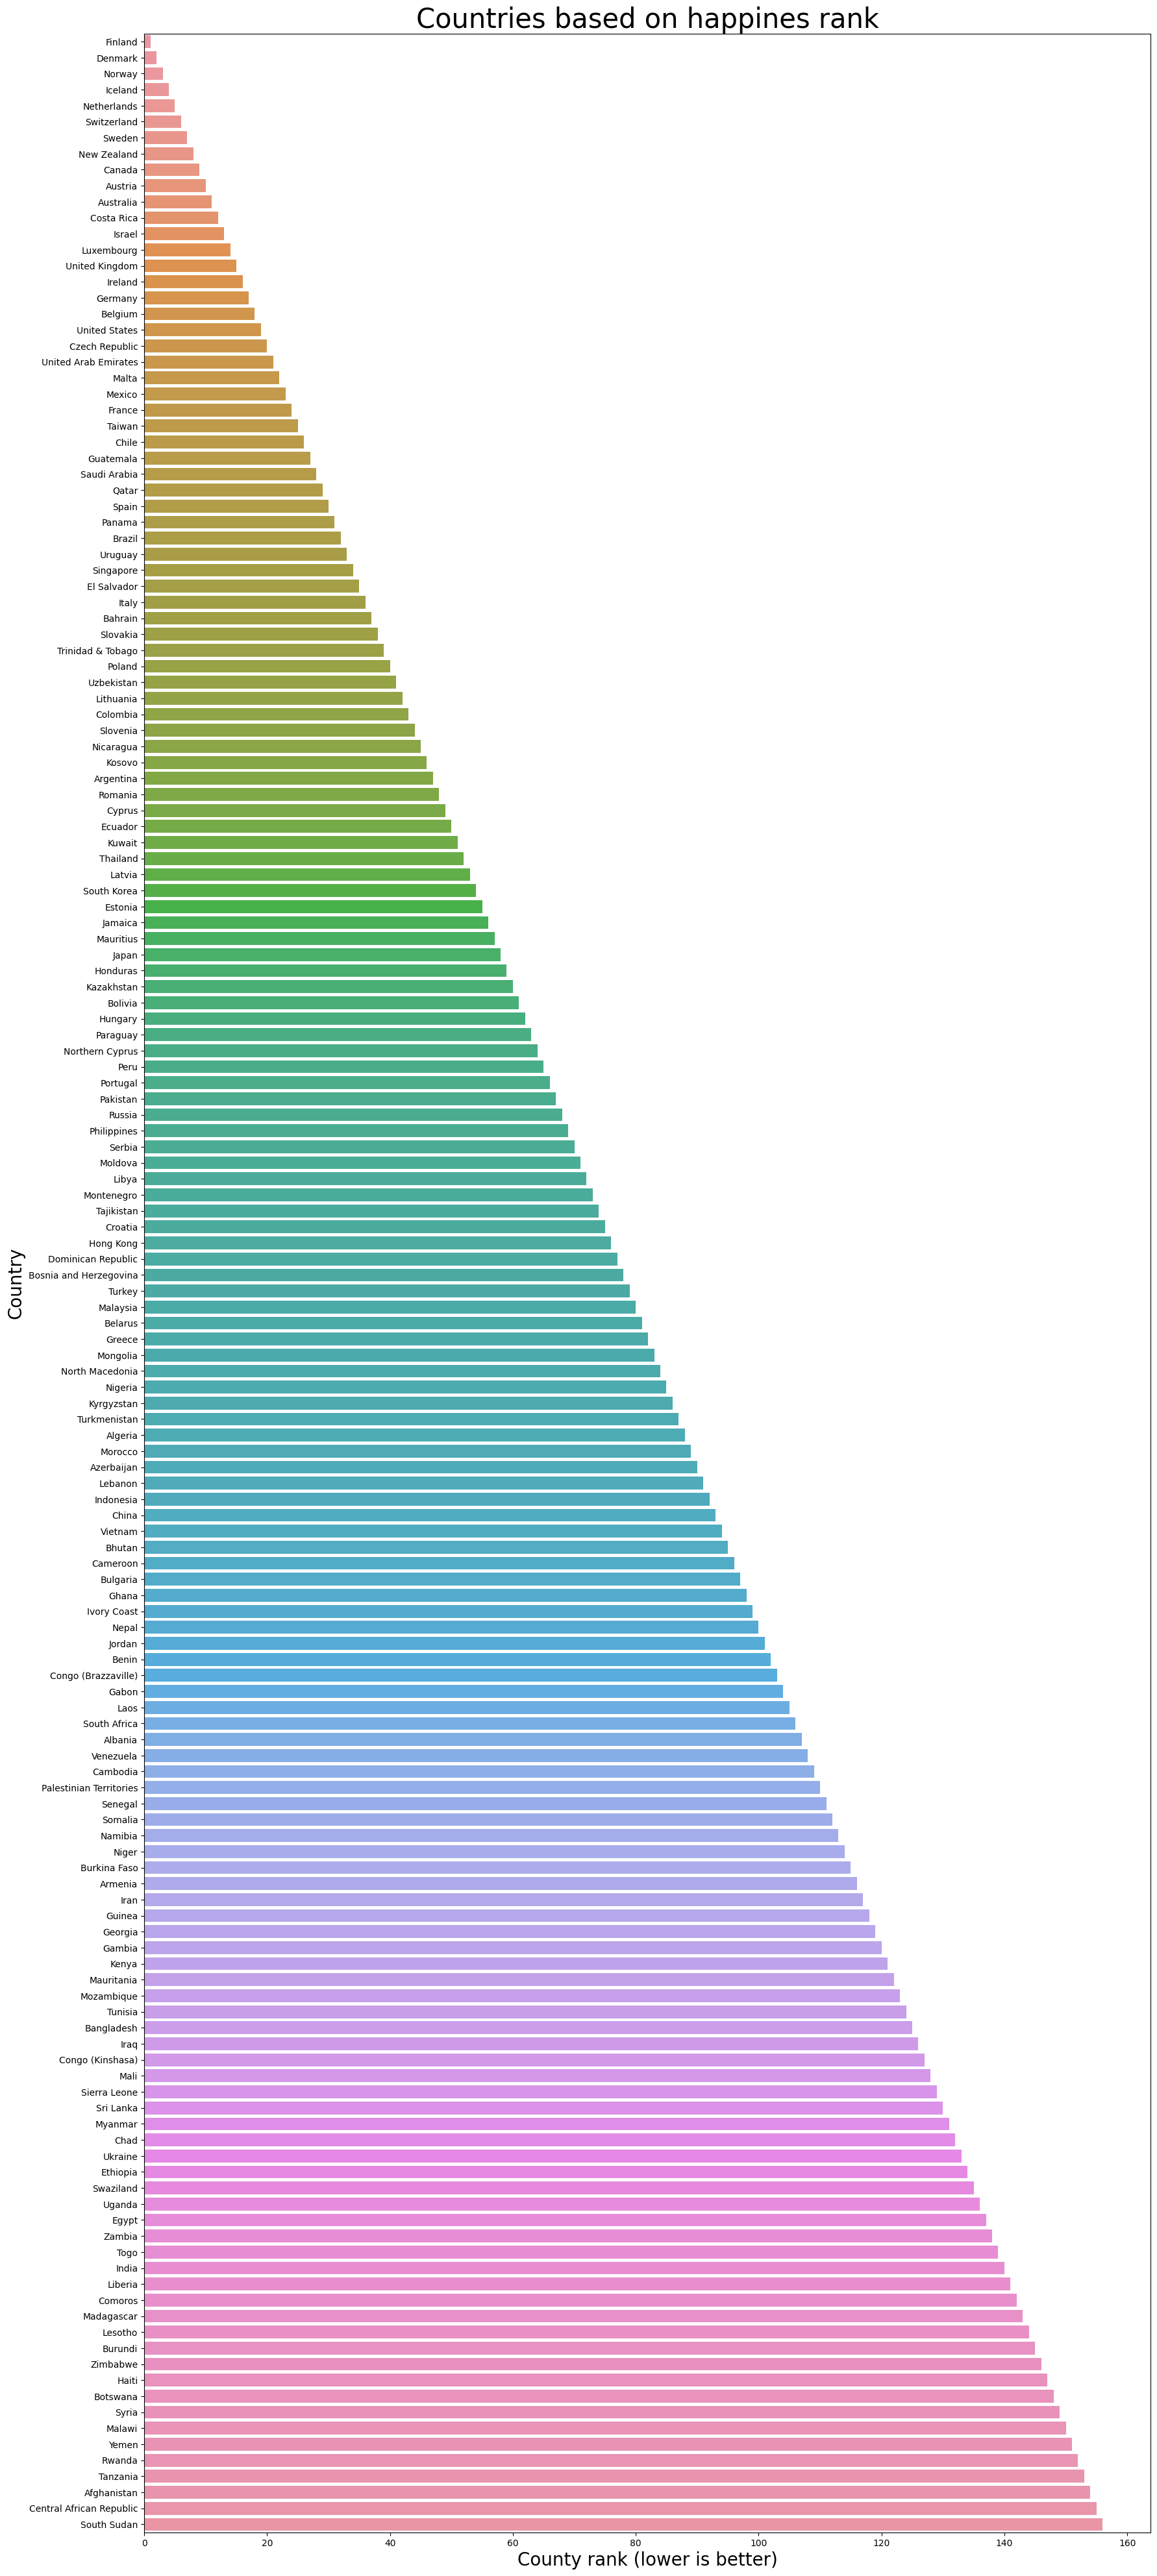

In [17]:
rank = file.sort_values(by='Overall rank', ascending=True)
plt.figure(figsize=(20,50))
sns.barplot(x = 'Overall rank', y = 'Country or region', data = rank)
plt.xlabel('County rank (lower is better)', fontsize=20)
plt.ylabel('Country', fontsize=20)
plt.title('Countries based on happines rank', fontsize=30, color='Black');

### Druhý graf

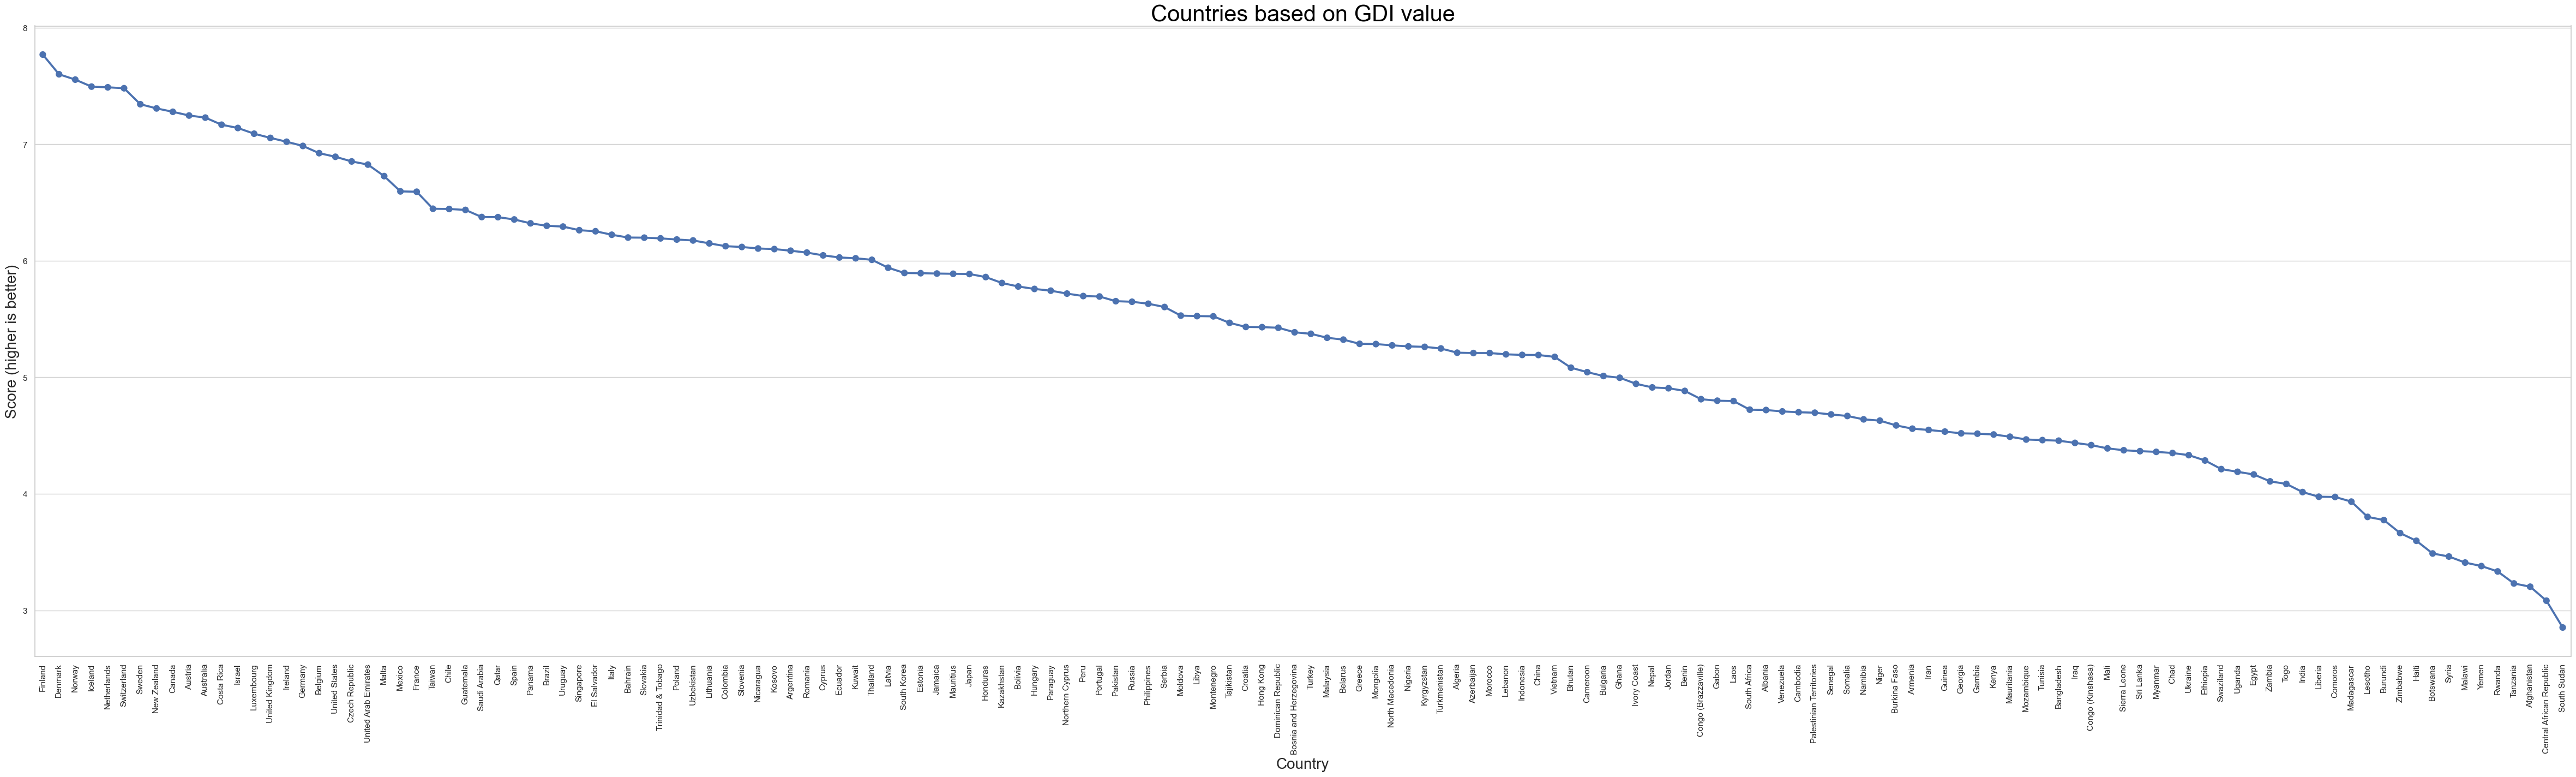

In [23]:
score = file.sort_values(by='Score', ascending=False)
plt.figure(figsize=(60,15))
sns.pointplot(x = 'Country or region', y = 'Score', data = score)
plt.xlabel('Country', fontsize=20)
plt.ylabel('Score (higher is better)', fontsize=20)
plt.xticks(rotation = 90)
plt.title('Countries based on GDI value', fontsize=30, color='Black');

### Třetí graf

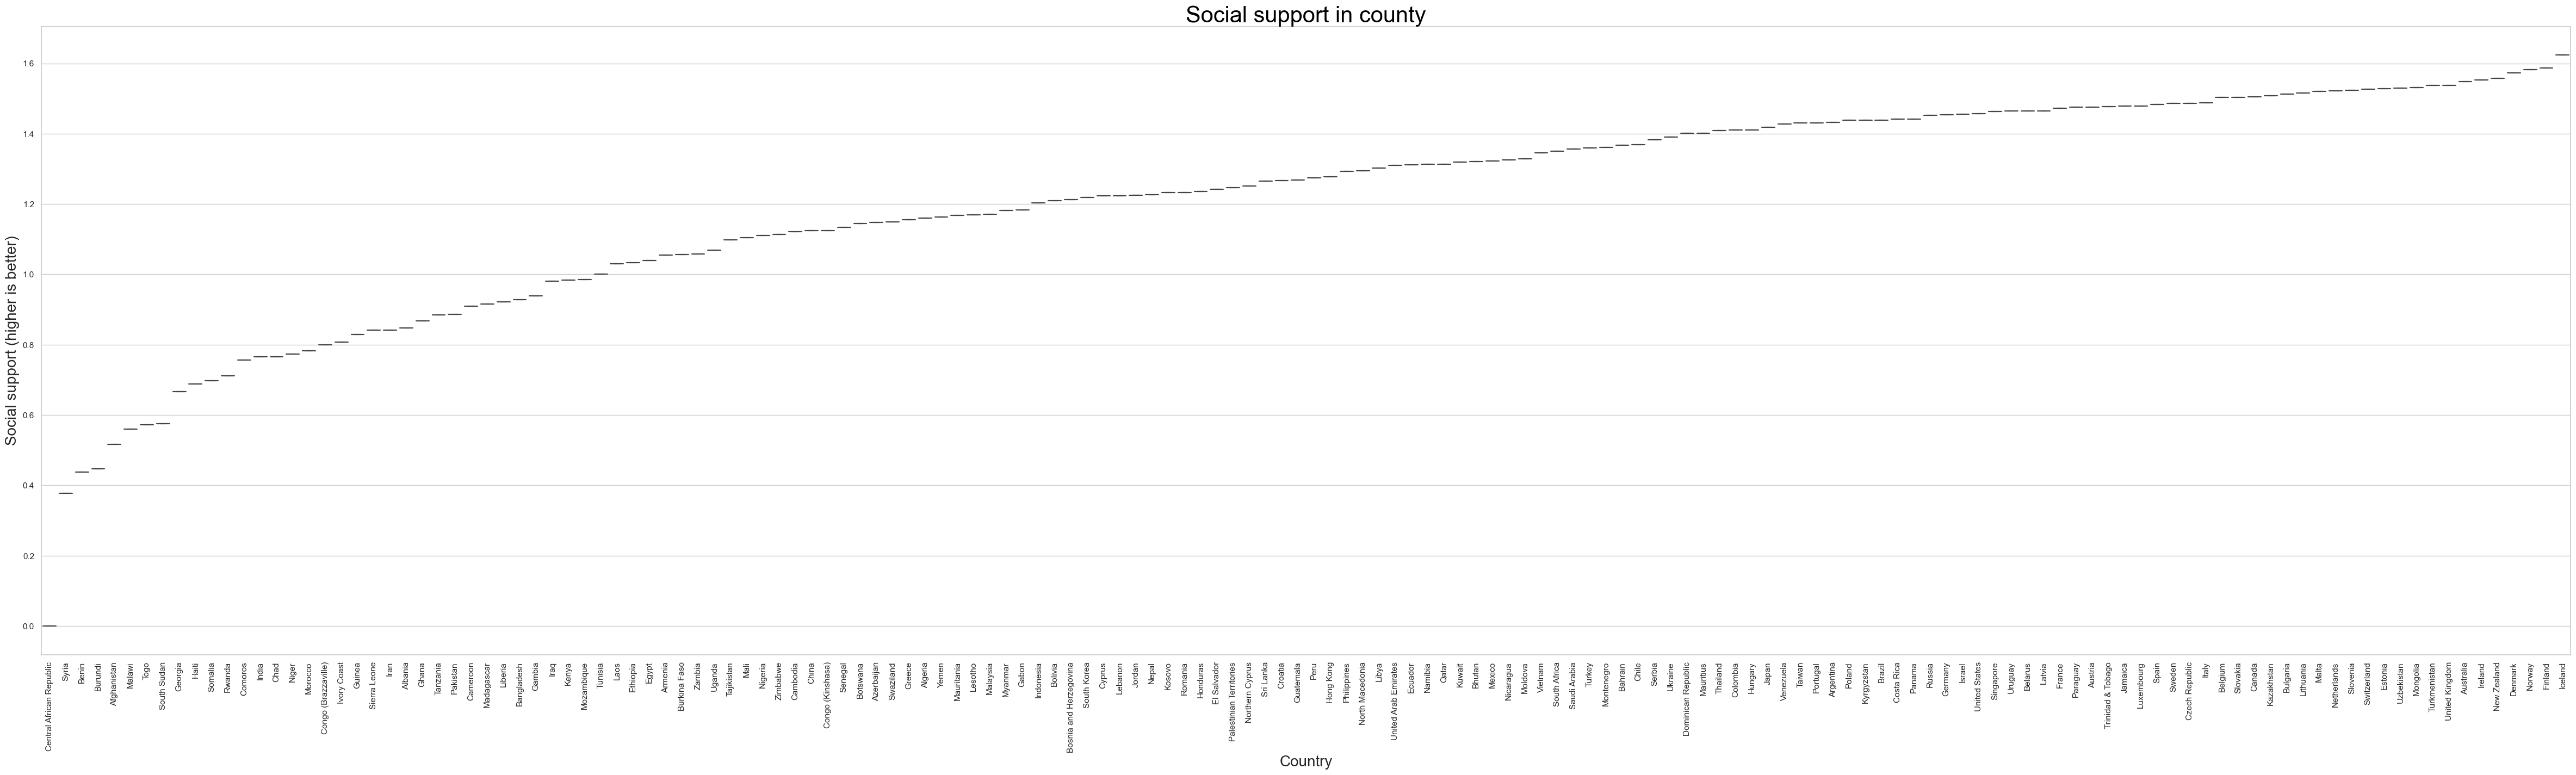

In [25]:
male_life = file.sort_values(by='Social support', ascending=True)
sns.set_theme(style="whitegrid")
plt.figure(figsize=(60,15))
sns.boxplot(x = 'Country or region', y = 'Social support', data = male_life)
plt.xlabel('Country', fontsize=20)
plt.ylabel('Social support (higher is better)', fontsize=20)
plt.xticks(rotation = 90)
plt.title('Social support in county', fontsize=30, color='Black');

### Čtvrtý graf

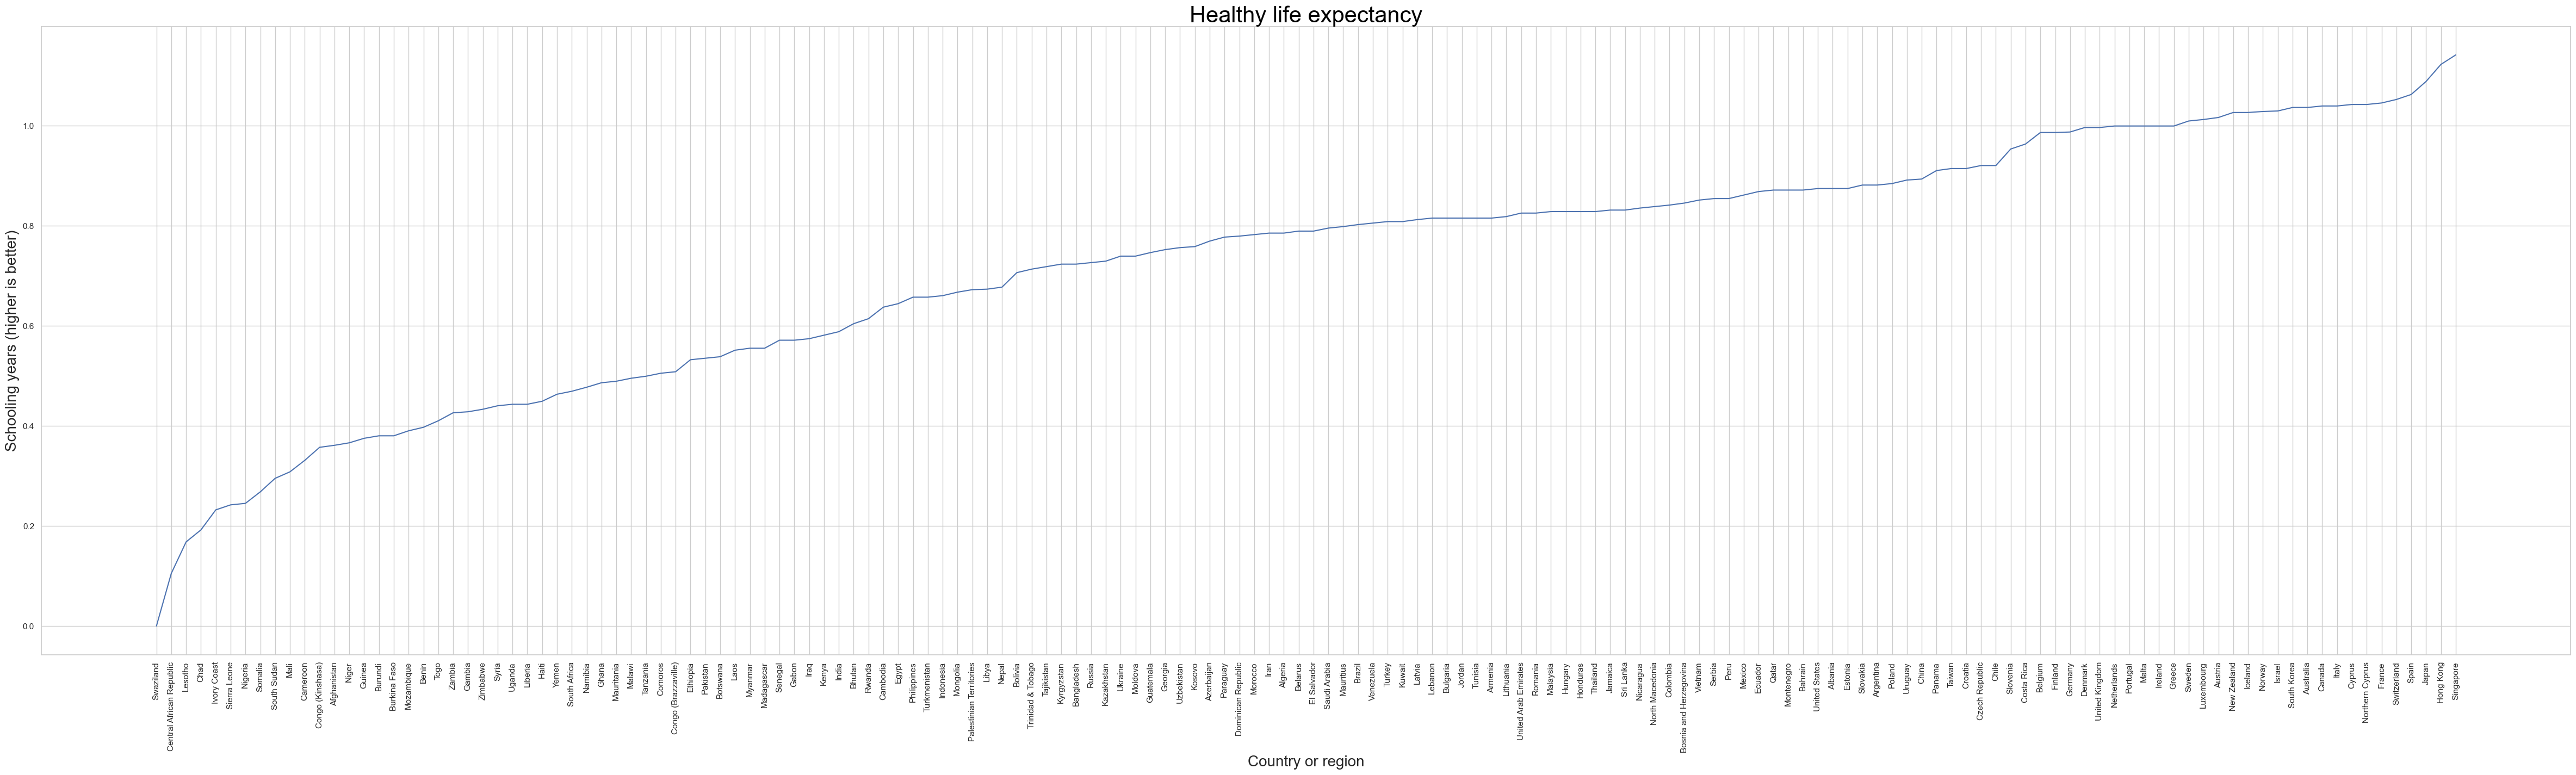

In [27]:
female_years = file.sort_values(by='Healthy life expectancy', ascending=True)
plt.figure(figsize=(60,15))
sns.lineplot(x = 'Country or region', y = 'Healthy life expectancy', data = female_years)
plt.xticks(rotation = 90)
plt.xlabel('Country or region', fontsize=20)
plt.ylabel('Schooling years (higher is better)', fontsize=20)
plt.title('Healthy life expectancy', fontsize=30, color='Black');

### Pátý graf

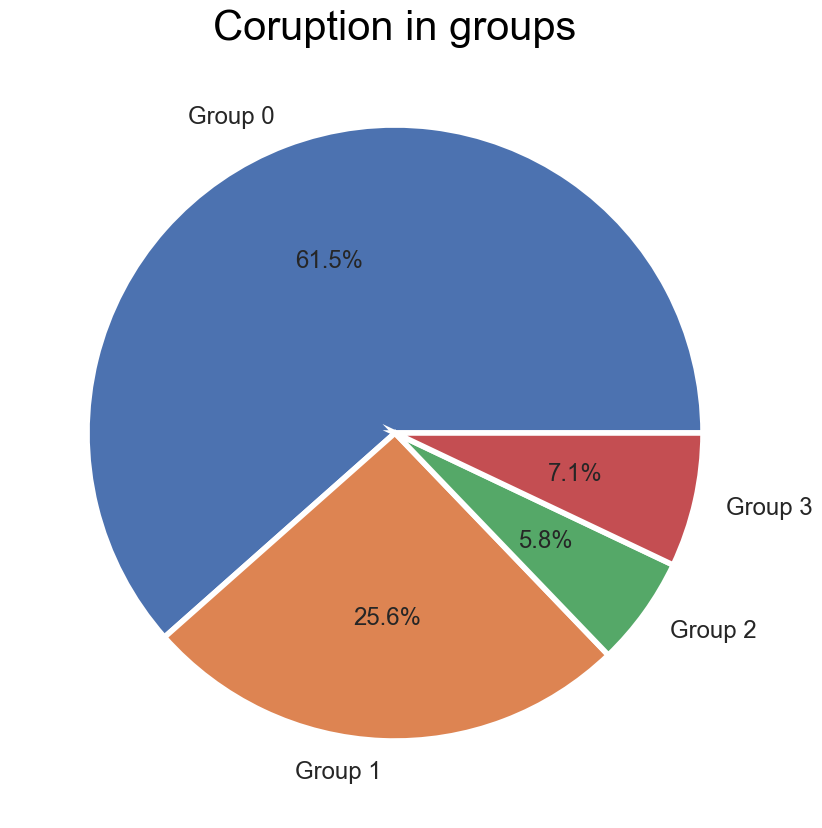

In [54]:
groups = [[], [], [], []]
for corup in file['Perceptions of corruption']:
    if corup < 0.1:
        groups[0].append(corup)
    elif corup < 0.2:
        groups[1].append(corup)
    elif corup < 0.3:
        groups[2].append(corup)
    else:
        groups[3].append(corup)

podil = []
labels = []
[labels.append(f"Group {i}") for i in range(len(groups))]

[podil.append(100/len(file) * len(groups[i])) for i in range(len(groups))]

fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(podil, labels=labels, autopct='%.1f%%', wedgeprops={'linewidth': 4.0, 'edgecolor': 'white'}, textprops={'size': 'x-large'})

ax.set_title('Coruption in groups', fontsize=30, color='Black')
plt.show()